In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('datatree/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>전처리

In [7]:
# PassengerId --> 삭제
# Pclass(선실등급) --> 사용
# Name --> 삭제
# Sex --> 사용
# Age --> 사용
# SibSp , Parch(동승자 정보) --> 사용
# Ticket --> 삭제
# Cabin --> 삭제(NaN이 많음)
# Embarked --> 사용
df.Name.unique()
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1 , inplace =True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


NaN값 처리

In [9]:
# NaN값 처리
#df.info()
# Age --> 평균값으로 치환
df.Age.fillna(df.Age.mean(),inplace = True)

In [10]:
# Embarked
#df.Embarked.value_counts()
#df.info()
#최빈값으로 채워넣기 df.Embarked.fillna('S' , inplace = True)

df.Embarked.fillna('N', inplace = True)
#그냥 아무 값으로 채워 넣는 거 선택 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


데이터 인코딩 (문자열 피쳐 --> 숫자형으로 변환)

In [12]:
# Sex --> 라벨인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.Sex) #매핑테이블을 만듬
df.Sex = le.transform(df.Sex) #실제변환
#le.fit_transform(df.Sex)

#male과 female을 0과1로 변환
#fit()과 transform() 함수는 fit_transform()로 한 번에 수행 가능

In [13]:
# Embarked --> 원핫인코딩
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#ohe.fit_transform(df.Embarked.values.reshape(-1,1))

#OnehotEncoder 보다는 pandas.get_dummies()함수 활용을 추천
ohe_embarked = pd.get_dummies(df.Embarked)
df = pd.concat([df,ohe_embarked],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,N,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,0,1


In [14]:
df = df.drop('Embarked',axis=1)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,N,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


In [16]:
#df.drop('Embarked',axis=1, inplace =True)
#df.head()

<h3> 머신러닝

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [18]:
#학습용 데이터와 테스트용 데이터 분리
df_X = df.drop('Survived',axis =1)
df_y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y)


In [19]:
# 1) 모델 객체 생성
dt = DecisionTreeClassifier()
# 2) 학습
dt.fit(X_train, y_train)
# 3) 평가
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

#과적합이라 판단(train에 비해 test 가 상대적으로 정확도가 떨어짐)

0.9775449101796407
0.7668161434977578


In [20]:
# GridSearchCV() 활용
params ={
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10]
}
grid_dt = GridSearchCV(dt, param_grid = params, cv=5)
grid_dt.fit(X_train ,y_train)#3*3 9개의 경우에서 다 해봄 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]})

In [21]:
print(grid_dt.score(X_train,y_train))
print(grid_dt.score(X_test,y_test))
#test가 조금 오름 
##하이퍼파라미터 최적화 한 것

0.8592814371257484
0.820627802690583


In [22]:
#grid_dt.best_params_
#grid_dt.best_score_
#가장 좋은 ??

In [23]:
#feature 의 중요도
#grid_dt.best_estimator_.feature_importances_
ft_imp = pd.DataFrame({'feature':df_X.columns,
             'importance':grid_dt.best_estimator_.feature_importances_})

<AxesSubplot:ylabel='feature'>

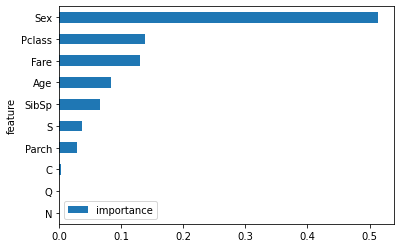

In [24]:
ft_imp.sort_values(by='importance').plot(x='feature',y='importance',kind = 'barh')

In [25]:
#!pip install graphviz

In [26]:
#결정트리 시각화
import graphviz
from sklearn import tree

In [27]:
# 시각화를 위한 간단한 결정 트리 생성
dt1 = DecisionTreeClassifier(max_depth = 2)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
data = tree.export_graphviz(dt1,
                           feature_names = df_X.columns,
                           class_names = ['Death','Survived'],
                           filled = True,
                           rounded = True)
#그래프 비즈에서 사용할 수 있게 만들어줌
#filled 색상 (불순도 낮으면 옅은, 높으면 짙은)

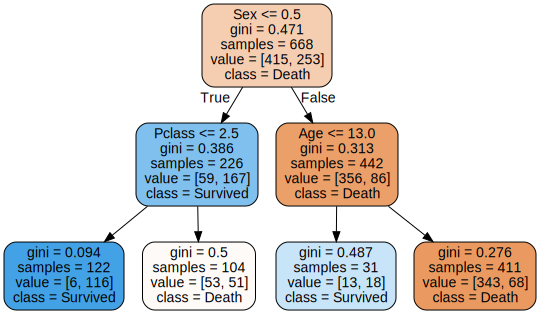

In [29]:
graph = graphviz.Source(data)
graph

##gini 불순도
#sample개수
#각각의 분포, 클래스 

In [ ]:
#파일로 저장
graph.render('titanic_prediction')